In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Définition de la base contenant les équipements par département en 2015 et 2020
df_nbeq = pd.read_csv('.\Bpe1520_nb_equip_DEP.csv',sep = ';').drop(columns='NB_2020')

df_nbeq

,DEP,TYPEQU,NB_2015
0,01,A101,2
1,01,A104,46
2,01,A105,0
3,01,A106,1
4,01,A107,4
...,...,...,...
12695,974,F305,1
12696,974,G101,112
12697,974,G102,75
12698,974,G103,0


In [31]:
# Aggrégation sur un nombre restreint de catégorie

categories = {'A10':'Justice',
                  'A203':'Banque',
                  'A30':'Automobile',
                  'A40':'Construction',
                  'B10':'Grande surface',
                  'B20':'Petite surface',
                  'B30':'Magasin de consommation',
                  'D':'Sante',
                  'E':'Transport',
                  'F':'Infrastructure sportive',
                  'G':'Tourisme'}
data_tout = pd.DataFrame()
for cat in categories:
    data = df_nbeq[df_nbeq['TYPEQU'].str.contains(cat)]
    data['Categorie'] = categories[cat]
    data_tout = pd.concat([data_tout, data])
    
data_tout


<ipython-input-31-5020c107d8f3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Categorie'] = categories[cat]


,DEP,TYPEQU,NB_2015,Categorie
0,01,A101,2,Justice
1,01,A104,46,Justice
2,01,A105,0,Justice
3,01,A106,1,Justice
4,01,A107,4,Justice
...,...,...,...,...
12672,974,E01G,0,Tourisme
12696,974,G101,112,Tourisme
12697,974,G102,75,Tourisme
12698,974,G103,0,Tourisme


In [37]:
data_tout.drop('TYPEQU', axis = 1, inplace = True)
data_tout

In [40]:
df_equip = data_tout.groupby(["DEP", "Categorie"]).sum().pivot_table(values = 'NB_2015',columns="Categorie", index = 'DEP')

In [41]:
df_equip

Categorie,Automobile,Banque,Construction,Grande surface,Infrastructure sportive,Justice,Magasin de consommation,Petite surface,Sante,Tourisme,Transport
DEP,,,,,,,,,,,
01,1216,295,4855,158,2181,57,1089,864,2788,385,276
02,770,176,3192,161,1928,57,864,693,2297,196,204
03,591,191,2343,108,1153,45,850,654,1794,258,137
04,348,97,1977,53,607,35,549,421,1194,329,86
05,285,98,1523,46,979,27,675,399,1168,415,99
...,...,...,...,...,...,...,...,...,...,...,...
95,1761,405,10385,202,1859,41,1887,1392,4711,339,2379
971,2098,157,5753,105,654,31,2075,1806,2734,228,314
972,1601,141,4252,91,664,29,1714,1092,2664,215,389


In [38]:
df[df["DEP"]=='01']['NB_2015'].sum()

57

In [4]:
#Dictionnaire des variables intéressantes
dict_var = {"B101":"Hypermarché",
            "B102":"Supermarché",
            "D102":"Etablissement sante moyen sejour",
            "D108":"Centre de sante","D201":"Medecin generaliste",
            "D401":"Hebergement personnes agees",
            "E01G":"Gare",
            "E102":"Aeroport",
            "F121":"Salle multisport"}

In [8]:
# On sélectionne les données intéressantes

equip = pd.DataFrame() #on crée un dataframe vide
for i in dict_var:  # on parcourt les variables que l'on a sélectionné dans notre dictionnaire
    equip = equip.append(df_nbeq[df_nbeq['TYPEQU']== str(i)]) # on ajoute à la nouvelle base les données associées
    equip['TYPEQU'][equip['TYPEQU']== str(i)] = dict_var[i] # on renomme les variables

<ipython-input-8-716afec048ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equip['TYPEQU'][equip['TYPEQU']== str(i)] = dict_var[i] # on renomme les variables


In [10]:
equip.drop(columns='NB_2020')

,DEP,TYPEQU,NB_2015
32,01,Hypermarché,15
159,02,Hypermarché,18
286,03,Hypermarché,11
413,04,Hypermarché,6
540,05,Hypermarché,4
...,...,...,...
12185,95,Salle multisport,208
12312,971,Salle multisport,35
12439,972,Salle multisport,25
12566,973,Salle multisport,41


In [11]:
# Création de la base equipements 2015
equip.drop(columns="NB_2020").to_csv(r'C:\Users\tle_p\Desktop\Théo\Etudes\ENSAE\2A-S1\Projet Python\base_equip_2015.csv')

In [8]:
df1 = equip[equip["DEP"]=="01"] #on crée une base avec les informations du département 01

In [9]:
df1

,DEP,TYPEQU,NB_2015,NB_2020
32,01,Hypermarché,15,12
33,01,Supermarché,98,120
57,01,Etablissement sante moyen sejour,21,22
63,01,Centre de sante,10,11
67,01,Medecin generaliste,448,442
91,01,Hebergement personnes agees,111,112
99,01,Gare,38,38
101,01,Aeroport,0,0
120,01,Salle multisport,143,145


On essaie de faire une modélisation mais ça fonctionne toujours pas !

In [17]:
work = df1.drop(columns="DEP").pivot_table(values = ['NB_2015','NB_2020'],columns="TYPEQU")

TypeError: 'Index' object is not callable

In [19]:
work

TYPEQU,Aeroport,Centre de sante,Etablissement sante moyen sejour,Gare,Hebergement personnes agees,Hypermarché,Medecin generaliste,Salle multisport,Supermarché
NB_2015,0,10,21,38,111,15,448,143,98
NB_2020,0,11,22,38,112,12,442,145,120


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E264B75400>,
      dtype=object)

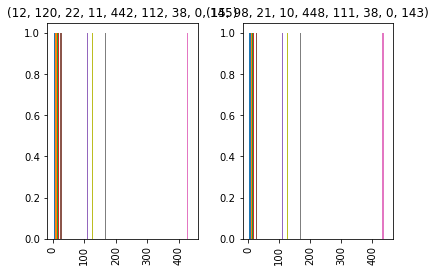

In [39]:
work.hist(by=[dict_var[i] for i in dict_var])

In [38]:
dict_var

{'B101': 'Hypermarché',
 'B102': 'Supermarché',
 'D102': 'Etablissement sante moyen sejour',
 'D108': 'Centre de sante',
 'D201': 'Medecin generaliste',
 'D401': 'Hebergement personnes agees',
 'E01G': 'Gare',
 'E102': 'Aeroport',
 'F121': 'Salle multisport'}

In [14]:
plt.barh()

NameError: name 'NB_2015' is not defined